In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [44]:
# Read csv files

train = open('train.csv','r')
test = open('test.csv','r')


In [45]:
# Use pandas to create data frames.
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

# Merge both datasets into one dataframe
total_df = pd.concat([train_df,test_df])
total_df.head()

,comment_text,id,identity_hate,insult,obscene,severe_toxic,threat,toxic
0,"Nonsense? kiss off, geek. what I said is true...",22256635,0.0,0.0,0.0,0.0,0.0,1.0
1,"""\n\n Please do not vandalize pages, as you di...",27450690,0.0,0.0,0.0,0.0,0.0,0.0
2,"""\n\n """"Points of interest"""" \n\nI removed the...",54037174,0.0,0.0,0.0,0.0,0.0,0.0
3,Asking some his nationality is a Racial offenc...,77493077,0.0,0.0,0.0,0.0,0.0,0.0
4,The reader here is not going by my say so for ...,79357270,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# add new column: Clean = 1 if all others are 0s and 0 otherwise 
train_df['Clean'] = np.where((train_df['toxic']==0) & (train_df['insult']==0) & (train_df['identity_hate']==0) 
             & (train_df['obscene']==0) & (train_df['severe_toxic']==0) & (train_df['threat']==0), 1, 0)

train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Clean
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0,0
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0,1
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0,1
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0,1
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0,1


In [31]:
#initialize dictionnary to store count
d = {}

for i in list(train_df.columns)[2:]:
    d[i]=len(train_df[train_df[i]==1])

# Dataframe with the counts 
count_df = pd.DataFrame(list(d.items()),columns=['Category','Count'])
count_df = count_df.sort_values(['Count'])

count_df

,Category,Count
2,threat,305
3,identity_hate,814
1,severe_toxic,965
4,insult,4765
0,obscene,5109
6,toxic,9237
5,Clean,86061


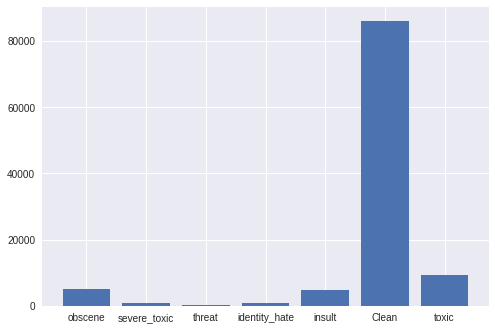

In [32]:
# Graph with counts
g_count = plt.bar(range(len(d)), d.values(), align='center')
g_count = plt.xticks(range(len(d)), list(d.keys()))
g_count = plt.show() #add numbers as label

In [33]:
# We can try to look at the train dataset without all the clean comments:

subtrain_df = train_df[(train_df['toxic']==1) | (train_df['insult']==1) | (train_df['identity_hate']==1) 
             | (train_df['obscene']==1) | (train_df['severe_toxic']==1) | (train_df['threat']==1)]

subtrain_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Clean
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0,0
20,225701312,Why hasn't Alitalia been removed rom the allia...,1,0,0,0,0,0,0
26,293668009,"""\nThe Graceful Slick....\nIs non other than a...",1,0,0,0,0,0,0
30,341549388,"""\n\n Stupid? \n\nAs soon as I saw the phrase ...",1,0,0,0,0,0,0
32,345843351,"""\nBan one side of an argument by a bullshit n...",1,0,1,0,1,0,0


In [34]:
# We can also make a dataframe for each type of data

train_toxic_df = train_df[train_df['toxic']==1]
train_severetoxic_df = train_df[train_df['severe_toxic']==1]
train_obscene_df = train_df[train_df['obscene']==1]
train_threat_df = train_df[train_df['threat']==1]
train_insult_df = train_df[train_df['insult']==1]
train_identityhate_df = train_df[train_df['identity_hate']==1]

In [65]:
## prepare data for model

def data_generator(dataset):
    """
   a function to return x and y
   where
   x = list of comments
   y = a one hot vector of the classes
   """

    # remove punctuation
    dataset['comment_text'] = [re.sub('[^\w\s]|(\n)',' ', i) for i in dataset['comment_text']]

    # create list and array
    x = list(dataset['comment_text'])
    y = np.array(dataset.iloc[:,2:])
    
    return[x,y]

In [63]:
#data_generator(train_df)